# Redes Q Profundas

Ahora vamos a conocer el tercer algoritmo de **Aprendizaje por Reforzamiento** en Machine Learning, que se llama **Redes Q Profundas**, y quiero aclarar, antes de explicarlo, que en su nombre tenemos una pista del tipo de modelo que utilizaremos. ***REDES* Q Profundas**, es un modelo que utiliza ***REDES* neuronales**, ese esquema de aprendizaje que te expliqué ayer, y que hoy veremos en la práctica al conocer este algoritmo.

Las Redes Q Profundas (o **DQN**, por sus siglas en inglés de *Deep Q-Networks*) son una técnica de **Aprendizaje por Refuerzo** que combina por un lado *redes neuronales*, y por otro *Q-learning*, que es este algoritmo que hemos visto hace algunas lecciones atrás.

La idea es que la **red neuronal profunda** prediga los **valores Q**, que se encargan de estimar cuán buena es cada acción dada una situación particular del entorno.

En pocas palabras, el funcionamiento de las DQNs se puede describir así:
+ Primero se dedica a **entender el estado del entorno**. Imagina que estás jugando un videojuego. La red neuronal ve todo lo que está pasando en el entorno del juego (como por ejemplo dónde están los enemigos, qué tan saludable estás, etc.) y eso es lo que llamamos el "estado" del entorno.
+ En segundo lugar aprende a **puntuar las acciones posibles**. Es decir que intenta predecir qué tan bueno será realizar tal acción, o tal otra, en ese momento del juego. A cada acción posible le asigna "puntos". Esos "puntos" son los **valores Q**, y la red intenta adivinarlos para saber qué tan buena será cada posible movida.
+ Tercero, va a intentar **elegir la mejor movida**, es decir que basándose en los puntos que calculó antes, la red decide cuál es la mejor acción a tomar. Por ejemplo, si disparar a un enemigo te dará más puntos que esconderte o huir, eso es lo que la red te dirá que hagas.
+ El cuarto paso es **aprender de las consecuencias**. Después de que hagas una acción, verás qué pasa en el juego (por ejemplo, si conseguiste puntos o si el enemigo te dañó). Esta nueva información ayuda a la red a ajustar sus cálculos para mejorar sus predicciones la próxima vez.
+ Y el quinto y último paso es **explorar nuevas estrategias**. A veces, la red decide probar algo nuevo en lugar de siempre hacer lo que cree que es mejor. Esto es como si decidieras explorar una parte desconocida del mapa en lugar de seguir el mismo camino. Esto ayuda a la red a aprender nuevas estrategias que podrían ser útiles en el futuro.

Muy bien, suficiente teoría, ahora veamos cómo programamos una **Red Q Profunda** con un ejemplo muy sencillo.


### Parte Práctica

Para este ejercicio vamos a usar una base de datos llamada **MNIST**, que es un conjunto de datos muy utilizado en el campo del aprendizaje automático, y que consiste en *imágenes de dígitos* escritos a mano, del **0** al **9**, tal como `Digits`, que hemos usado el día de ayer para aprender **autoencoders**. Son imágenes en blanco y negro y su tamaño es de **28**x**28** píxeles, o sea que son imágenes más definidas que digits, que eran de **8**x**8**. 

Y lo que vamos a hacer es usar las **Redes Q Profundas** para aprender a clasificar dígitos escritos a mano del conjunto de datos **MNIST**, mejorando la precisión del modelo a medida que entrena y ajusta sus predicciones basadas en los errores cometidos previamente.

Aquí tenemos las bibliotecas que vamos a usar en este ejercicio, que tienen varios jugadores nuevos que vamos a ir conociendo en esta lección.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

Observa que `mnist` es básicamente una **tupla**, que contiene **dos grandes tuplas**. En cada una de esas tuplas hay conjuntos de arrays, que se organizan de la siguiente manera:

In [2]:
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()

Si quieres puedes explorar qué es lo que contiene cada una de estas variables y cómo se ven, para que te quede bien claro su contenido. Yo por ahora voy a ir avanzando porque ya sé lo que contienen, y es lo que he descripto en los nombres de las variables.

Ahora vamos a **normalizar los valores** que tenemos. Recuerda que una medida ideal para el procesamiento de datos variados, es escalar todos los valores dentro de un rango que vaya del `0` al `1`. Como los valores que contienen estos arrays van entre `0` y `255`, los voy a dividir por `255` para que queden entre `0` y `1`.

In [3]:
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0

Ahora quiero normalizar los valores de las *etiquetas*, y lo voy a hacer de un modo muy particular. Primero te muestro lo que contienen.

In [4]:
etiquetas_entrenamiento[0]

5

Las etiquetas son simples valores de números enteros que van de `0`a `9`, porque de hecho estas etiquetas son las que indican qué número está representado en cada imagen. Para **normalizar estas etiquetas** les voy a aplicar el método `to_categorical()` que hemos importado, y que va a transformar a estas etiquetas en un **array de 10 números**, donde solo uno de ellos es `1` y todos los demás son `0`.

In [5]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)

In [6]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Los datos ya están preparados. El siguiente paso va a ser **definir el modelo**.

Entonces el siguiente bloque va a definir la estructura de un modelo de red neuronal utilizando `keras`, que ya hemos usado antes, y es una biblioteca de aprendizaje profundo en Python, de la cual hemos importado a este cuaderno el modelo `Sequential`.

In [7]:
modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Federico\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Los modelos secuenciales son una **pila lineal de capas** donde cada capa tiene exactamente un *tensor de entrada* y un *tensor de salida*. Por esa razón el contenido que le he asignado a `Sequential()` es una serie de capas que se van apilando una tras otra en este modelo.

+ La primera capa es de tipo `Flatten`, que es una capa que no tiene parámetros y simplemente reformatea los datos de entrada. Aquí, transforma las imágenes de entrada de **28**x**28** píxeles en un vector de **784** píxeles (que es el resultado de multiplicar 28x28). Esto es necesario porque la siguiente capa, que va a ser una capa densa, va a necesitar un solo vector de entrada y no una matriz de dos dimensiones.
+ La segunda es una capa `Dense` (densa o completamente conectada) que tiene **128 neuronas**. Cada neurona en esta capa está conectada a todas las entradas de la capa anterior (las 784 unidades de información del vector aplanado). La función de activación `relu` (Rectified Linear Unit), que ya hemos usado antes, se va a estar aplicando a la salida de cada neurona. Es muy común que usemos `relu`, porque ayuda a evitar problemas en el proceso de aprendizaje y porque generalmente permite que el modelo aprenda más rápido.
+ La tercera y última capa, tambien es `Dense`, y funciona como capa de salida del modelo. Esta capa tiene **10 neuronas**, que se corresponden con las 10 clases de dígitos (que van del `0` al `9`). La función de activación `softmax` se utiliza aquí para convertir los valores de las neuronas en probabilidades que suman 1. ¿Qué sería esto? Que cada salida puede interpretarse como la probabilidad de que la entrada pertenezca a una de las 10 clases.

Ok. Entonces el modelo está definido, ahora toca **compilarlo**. Compilar un modelo de aprendizaje consiste en configurarlo para el entrenamiento, e implica definir varias piezas clave que el modelo necesita para entrenarse de manera efectiva.

In [8]:
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Aquí estamos definiendo los **3 elementos** fundamentales del entrenamiento, que son el **optimizador**, la **función de pérdida** y las **métricas**.

Lo comparemos con el entrenamiento en un gimnasio:
+ El `optimizer` (optimizador) sería como la **rutina de ejercicios**. Dependiendo de tus objetivos (perder peso, ganar músculo), el entrenador ajusta tu plan de ejercicios, la intensidad y el volumen para optimizar los resultados. Eso hace el optimizador. Ajusta los pesos de la red para minimizar la función de pérdida. Es como un plan que guía el entrenamiento, y que va decidiendo cómo y cuándo ajustar los pesos para mejorar el modelo. Aquí hemos elegido el optimizador `adam` que es una opción muy popular en muchos problemas de aprendizaje profundo debido a su adaptabilidad, su eeficiencia en diferentes condiciones y a que requiere poca configuración manual.
+ El parámetro `loss` (o función de pérdida) sería como los **objetivos de fitness**, que puede ser alcanzar un cierto peso corporal o levantar una cantidad específica de peso. Tus entrenamientos van a diseñarse para reducir la "pérdida" entre tu estado actual y tus metas. En un modelo, la función de pérdida mide qué tan bien el modelo está prediciendo los resultados esperados. El objetivo es reducir esta pérdida a lo largo del tiempo, lo que, si sucede, indicaría que el modelo está mejorando en su aprendizaje. En este caso hemos elegido `categorical_crossentropy` porque compara la distribución de las predicciones del modelo con las etiquetas reales, y de esta manera optimiza el modelo minimizando esta diferencia de probabilidad.
+ Las `metrics` (métricas) vienen a ser como la forma en que **mides el avance** del proceso. En el gimnasio podrían ser las medidas de tu cuerpo, el peso que levantas, o el tiempo que corres. Estas métricas te ayudan a ver si estás acercándote a tus objetivos de fitness o si tu plan necesita ajustes. En un modelo, las métricas como la precisión o la exactitud se usan para evaluar el rendimiento del modelo, y te dan una idea clara de cómo está progresando el modelo. Elegimos `accuracy` porque es una métrica que proporciona una evaluación muy clara y directa del rendimiento general en tareas de clasificación.

Bueno, y ahora sí, con el modelo ya creado y ya compilado, vamos a entrenarlo:

In [9]:
modelo.fit(imagenes_entrenamiento,
          etiquetas_entrenamiento,
          epochs=5,
          validation_data=(imagenes_prueba, etiquetas_prueba))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8749 - loss: 0.4372 - val_accuracy: 0.9569 - val_loss: 0.1393
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.1242 - val_accuracy: 0.9690 - val_loss: 0.0996
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0839 - val_accuracy: 0.9710 - val_loss: 0.0912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9822 - loss: 0.0577 - val_accuracy: 0.9749 - val_loss: 0.0751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0454 - val_accuracy: 0.9771 - val_loss: 0.0759


Nuestro modelo ha sido entrenado, y ya es capaz de predecir con buenas chances qué número es el que hay en cada imagen. Es decir, ha aprendido a ver las imágenes de 28 x 28 que forman números usando valores de grises, y asociarlas con etiquetas que dicen qué números están representados en esas imágenes.

Entonces ahora, nuestro modelo puede recibir una nueva imagen, y decir *"eso es un 9"*, por ejemplo.

Lo vamos a comprobar generando unas **visualizaciones** que nos permitan ver esto en acción.

Para eso primero vamos a generar unas predicciones del conjunto de datos de prueba.

In [10]:
predicciones = modelo.predict(imagenes_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Y ahora vamos a definir una función para visualizar:
+ una imagen
+ la etiqueta que el modelo ha predicho
+ la etiqueta real

In [11]:
def ver_imagen(array_predicciones, etiqueta_real, img):
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    etiqueta_predicha = np.argmax(array_predicciones)
    if etiqueta_predicha == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f'Pred: {etiqueta_predicha} Real: {etiqueta_real}', color=color)

Y por último, vamos a usar la función `ver_imagen()` en un **loop** para representar un grupo de imágenes y ver qué tan bien está prediciendo nuestro modelo.

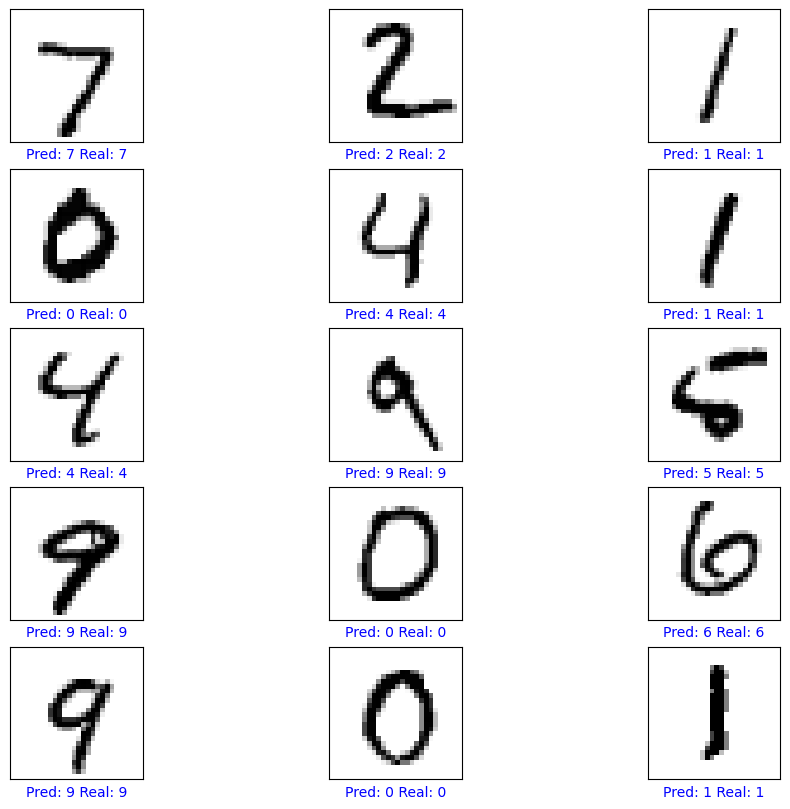

In [12]:
filas = 5
columnas = 3
numero_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))

for i in range(numero_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    ver_imagen(predicciones[i], etiquetas_prueba[i], imagenes_prueba[i]);

Este ha sido un ejemplo bastante claro de cómo funcionan las **Redes Q Profundas**, y el día se va acercando a su fin, pero todavía quedan algunas cosas más por aprender.

No nos detengamos ahora.